In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

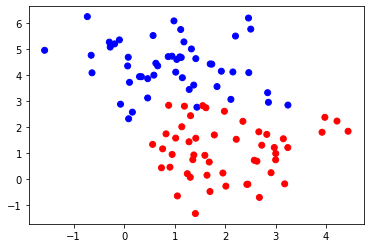

In [55]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
plt.scatter(X[:,0], X[:, 1], c=y, cmap='bwr')

In [56]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [57]:
y=y.reshape((y.shape[0],1))

In [58]:
print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


# 1.Perceptron

In [59]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [60]:
#randn normal distribution
def initialisation(X):
    W=np.random.randn(X.shape[1],1)
    b=np.random.randn(1)
    return (W,b)

In [61]:
def forward_propagation(X, W, b):
    Z=X.dot(W) + b   
    A=sigmoid(Z)
    return A

In [62]:
def cross_entropy(y, A):
    return 1/len(y) *np.sum(-y*np.log(A)- (1-y)*np.log(1-A))

In [63]:
def gradients(X,A,y):
    dW=(1/len(y)) * np.dot(X.T, (A-y))
    db=(1/len(y)) * np.sum(A-y)
    return(dW,db)

In [64]:
def optimisation(X,W, b, A,y, learning_rate):
    dw, db = gradients(X,A,y)
    W=W-learning_rate*dw
    b=b-learning_rate*db
    return(W,b)

In [65]:
def predict(X, W,b):
    A=forward_propagation(X, W, b)
    return A>=0.5

In [66]:
W,b=initialisation(X)
A=forward_propagation(X, W, b)
loss=cross_entropy(y, A)
dW, db=gradients(X,A,y)
W, b=optimisation(X,W, b, A,y, learning_rate=0.1)
predict(X,W,b)
print(W.shape, b.shape, A.shape, loss)
print(dW.shape,db.shape)

(2, 1) (1,) (100, 1) 0.6112190059192204
(2, 1) ()


In [67]:
def perceptron(X,y,learning_rate=0.1,n_iter=100):
    W,b=initialisation(X)
    #Training
    for i in range(n_iter):
        A=forward_propagation(X, W, b)
        loss=cross_entropy(y, A)
        W, b=optimisation(X,W, b, A,y, learning_rate=0.1)
    #prediction
    y_pred=predict(X,W,b)
    
    return y_pred
    
    

In [76]:
y_pred= perceptron(X, y)


In [71]:
y_pred= perceptron(X, y)



In [74]:
y.shape

(100, 1)

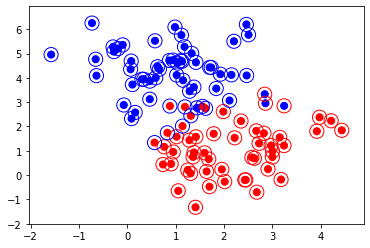

In [75]:
plt.scatter(X[:, 0], X[:, 1], c=np.squeeze(y), cmap='bwr', s=50)

plt.scatter(X[np.squeeze(y_pred==True), 0], X[np.squeeze(y_pred==True), 1], cmap='bwr', s=200, facecolor='none', edgecolors='red')
plt.scatter(X[np.squeeze(y_pred==False), 0], X[np.squeeze(y_pred==False), 1], cmap='bwr', s=200, facecolor='none', edgecolors='blue')